✅ Conexión exitosa a BDDEACEROQA


C:\Users\ratha\AppData\Local\Temp\ipykernel_6648\222732900.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_mda = pd.read_sql(query_mda, conn)
C:\Users\ratha\AppData\Local\Temp\ipykernel_6648\222732900.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_mtr = pd.read_sql(query_mtr, conn)


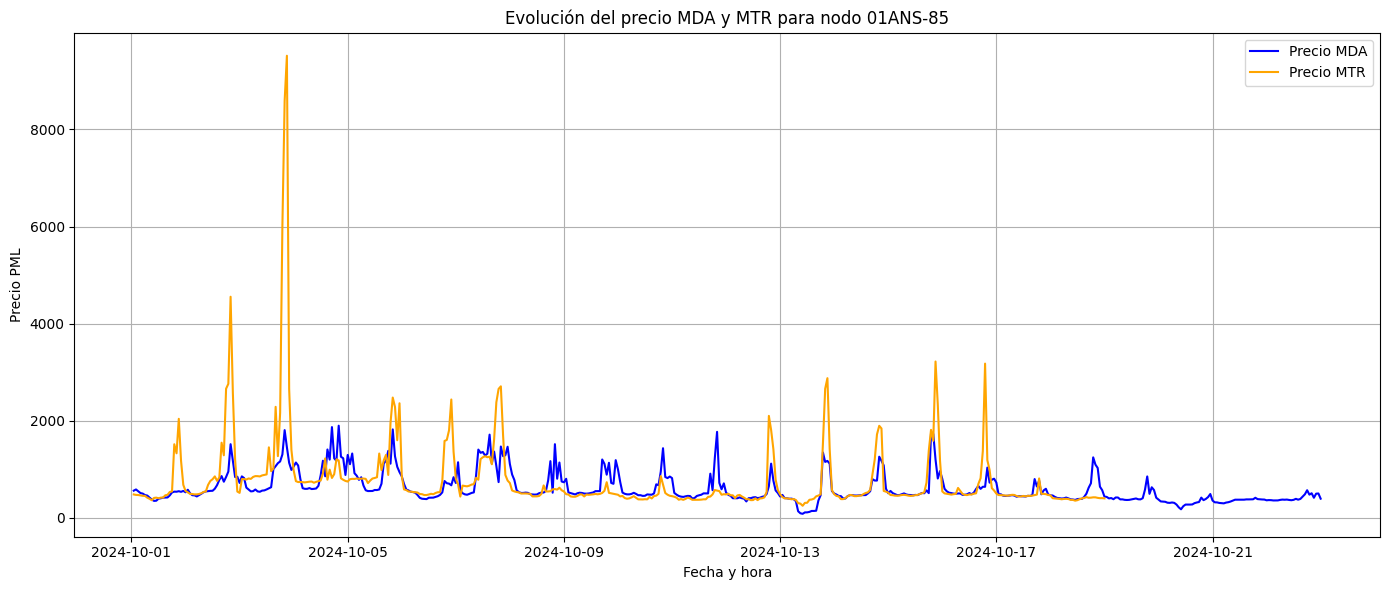

🔒 Conexión cerrada correctamente.


In [85]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt

# Conexión a SQL Server
try:
    conn = pyodbc.connect(
        r'DRIVER={ODBC Driver 17 for SQL Server};'
        r'SERVER=Fernando-2020\SQLEXPRESS;'
        r'DATABASE=BDDEACEROQA;'
        r'Trusted_Connection=yes;'
    )
    cursor = conn.cursor()
    print("✅ Conexión exitosa a BDDEACEROQA")
except Exception as e:
    print("❌ Error al conectar:", e)
    exit()

# Consultas SQL
query_mda = """
SELECT fecha, hora, pml
FROM MemSch.MemTraMDADet
WHERE claNodo = '01ANS-85'
ORDER BY fecha, hora
"""
query_mtr = """
SELECT fecha, hora, pml
FROM MemSch.MemTraMTRDet
WHERE claNodo = '01ANS-85'
ORDER BY fecha, hora
"""

# Leer los datos
df_mda = pd.read_sql(query_mda, conn)
df_mtr = pd.read_sql(query_mtr, conn)

# Convertir fecha + hora a datetime
df_mda['datetime'] = pd.to_datetime(df_mda['fecha']) + pd.to_timedelta(df_mda['hora'], unit='h')
df_mtr['datetime'] = pd.to_datetime(df_mtr['fecha']) + pd.to_timedelta(df_mtr['hora'], unit='h')

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(df_mda['datetime'], df_mda['pml'], label='Precio MDA', color='blue')
plt.plot(df_mtr['datetime'], df_mtr['pml'], label='Precio MTR', color='orange')
plt.title('Evolución del precio MDA y MTR para nodo 01ANS-85')
plt.xlabel('Fecha y hora')
plt.ylabel('Precio PML')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Cerrar conexión
conn.close()
# Cerrar conexión
print("🔒 Conexión cerrada correctamente.")


✅ Conexión exitosa a BDDEACEROQA


C:\Users\ratha\AppData\Local\Temp\ipykernel_6648\4184504807.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_mda_all = pd.read_sql(query_mda_all, conn)
C:\Users\ratha\AppData\Local\Temp\ipykernel_6648\4184504807.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_mtr_all = pd.read_sql(query_mtr_all, conn)


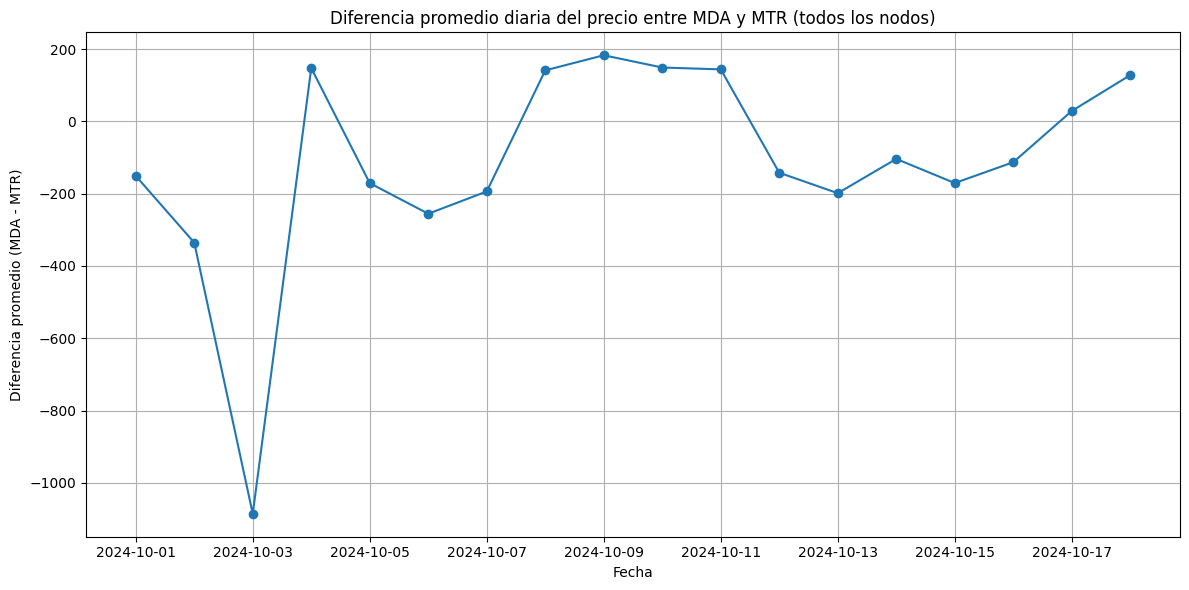

In [86]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt

# Conexión a SQL Server
try:
    conn = pyodbc.connect(
        r'DRIVER={ODBC Driver 17 for SQL Server};'
        r'SERVER=Fernando-2020\SQLEXPRESS;'
        r'DATABASE=BDDEACEROQA;'
        r'Trusted_Connection=yes;'
    )
    cursor = conn.cursor()
    print("✅ Conexión exitosa a BDDEACEROQA")
except Exception as e:
    print("❌ Error al conectar:", e)
    exit()
# Consultar todos los nodos para MDA y MTR
query_mda_all = """
SELECT fecha, hora, claNodo, pml
FROM MemSch.MemTraMDADet
ORDER BY fecha, hora, claNodo
"""
query_mtr_all = """
SELECT fecha, hora, claNodo, pml
FROM MemSch.MemTraMTRDet
ORDER BY fecha, hora, claNodo
"""

# Leer los datos
df_mda_all = pd.read_sql(query_mda_all, conn)
df_mtr_all = pd.read_sql(query_mtr_all, conn)

# Unir ambos dataframes por fecha, hora y claNodo
df_merged = pd.merge(
    df_mda_all,
    df_mtr_all,
    on=['fecha', 'hora', 'claNodo'],
    suffixes=('_mda', '_mtr')
)

# Calcular la diferencia de precios
df_merged['diff'] = df_merged['pml_mda'] - df_merged['pml_mtr']

# Agrupar por fecha y calcular la diferencia promedio diaria
df_daily = df_merged.groupby('fecha')['diff'].mean().reset_index()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(df_daily['fecha']), df_daily['diff'], marker='o')
plt.title('Diferencia promedio diaria del precio entre MDA y MTR (todos los nodos)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia promedio (MDA - MTR)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [87]:
# Unir ambas tablas en una sola, agregando columna 'origen'
import pandas as pd
import pyodbc

# Conexión a la base de datos
conn = pyodbc.connect(
    r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=Fernando-2020\SQLEXPRESS;'
    r'DATABASE=BDDEACEROQA;'
    r'Trusted_Connection=yes;'
)

# Consulta para MDA
query_mda = """
SELECT 'MDA' AS origen, claNodo, fecha, hora, pml, pml_ene, pml_per, pml_cng
FROM MemSch.MemTraMDADet
"""

# Consulta para MTR
query_mtr = """
SELECT 'MTR' AS origen, claNodo, fecha, hora, pml, pml_ene, pml_per, pml_cng
FROM MemSch.MemTraMTRDet
"""

# Leer ambos DataFrames
df_mda = pd.read_sql(query_mda, conn)
df_mtr = pd.read_sql(query_mtr, conn)

# Unir ambos en un solo DataFrame
df_union = pd.concat([df_mda, df_mtr], ignore_index=True)

# Mostrar primeros registros de validación
df_union.head()


C:\Users\ratha\AppData\Local\Temp\ipykernel_6648\3974247538.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_mda = pd.read_sql(query_mda, conn)
C:\Users\ratha\AppData\Local\Temp\ipykernel_6648\3974247538.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_mtr = pd.read_sql(query_mtr, conn)


,origen,claNodo,fecha,hora,pml,pml_ene,pml_per,pml_cng
0,MDA,01ALR-85,2024-10-01,1,557.13,528.92,28.11,0.10
1,MDA,01AMM-230,2024-10-01,1,529.73,528.92,1.23,-0.42
2,MDA,01AMO-85,2024-10-01,1,563.57,528.92,34.60,0.06
3,MDA,01ANL-85,2024-10-01,1,556.34,528.92,27.27,0.16
4,MDA,01ANM-115,2024-10-01,1,548.14,528.92,19.37,-0.14


In [88]:
# Une esta tabla creada en el paso anterior y la de TC, para agregar a una columna de valor para tener tambien el tc
query_tc = """
SELECT fecha, valor
FROM MemSch.MemTraTcDet
"""

df_tc = pd.read_sql(query_tc, conn)

# Unir con df_union por la columna 'fecha'
df_union_tc = pd.merge(df_union, df_tc, on='fecha', how='left')

# Mostrar resultados
df_union_tc.head()


C:\Users\ratha\AppData\Local\Temp\ipykernel_6648\3799814066.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tc = pd.read_sql(query_tc, conn)


,origen,claNodo,fecha,hora,pml,pml_ene,pml_per,pml_cng,valor
0,MDA,01ALR-85,2024-10-01,1,557.13,528.92,28.11,0.10,19.6697
1,MDA,01AMM-230,2024-10-01,1,529.73,528.92,1.23,-0.42,19.6697
2,MDA,01AMO-85,2024-10-01,1,563.57,528.92,34.60,0.06,19.6697
3,MDA,01ANL-85,2024-10-01,1,556.34,528.92,27.27,0.16,19.6697
4,MDA,01ANM-115,2024-10-01,1,548.14,528.92,19.37,-0.14,19.6697


In [89]:
# Genera un dataframe que tenga el promedio diario de los precios del pml
query_tbfin = """
SELECT fecha, TbFin
FROM MemSch.MemTraTBFinVw
"""

df_tbfin = pd.read_sql(query_tbfin, conn)

# Unir con df_union_tc por la columna 'fecha'
df_comparado = pd.merge(df_union_tc, df_tbfin, on='fecha', how='left')

# Filtrar donde pml > TbFin
df_pml_mayor_tbfin = df_comparado[df_comparado['pml'] > df_comparado['TbFin']][['claNodo', 'fecha', 'hora', 'pml', 'TbFin']]

# Mostrar resultados
df_pml_mayor_tbfin.head()


C:\Users\ratha\AppData\Local\Temp\ipykernel_6648\4263752135.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tbfin = pd.read_sql(query_tbfin, conn)


,claNodo,fecha,hora,pml,TbFin
0,01ALR-85,2024-10-01,1,557.13,449.792535
1,01AMM-230,2024-10-01,1,529.73,449.792535
2,01AMO-85,2024-10-01,1,563.57,449.792535
3,01ANL-85,2024-10-01,1,556.34,449.792535
4,01ANM-115,2024-10-01,1,548.14,449.792535


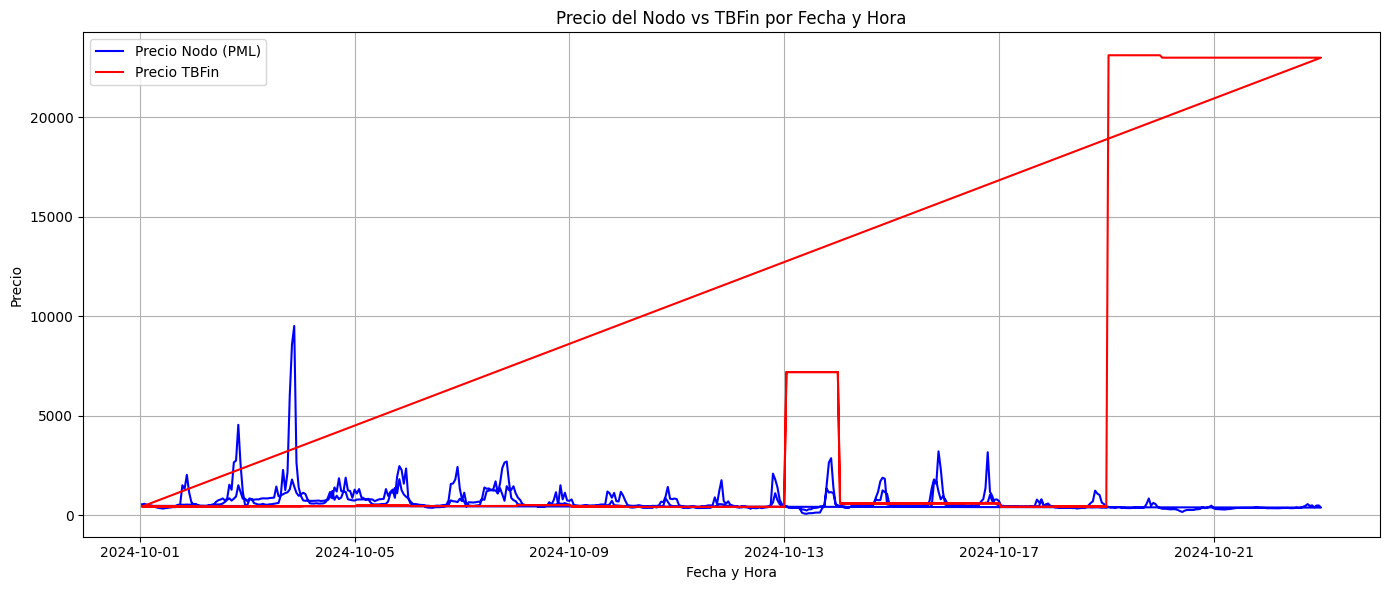

In [ ]:
# Graficar la comparación de precios PML y TBFin por fecha y hora
import matplotlib.pyplot as plt

# Crear columna datetime combinando fecha y hora
df_comparado['datetime'] = pd.to_datetime(df_comparado['fecha']) + pd.to_timedelta(df_comparado['hora'], unit='h')

# Opcional: filtrar por un nodo específico para mayor claridad, por ejemplo "01ANS-85"
df_comparado = df_comparado[df_comparado['claNodo'] == '01ANS-85']

# Gráfica
plt.figure(figsize=(14, 6))
plt.plot(df_comparado['datetime'], df_comparado['pml'], label='Precio Nodo (PML)', color='blue')
plt.plot(df_comparado['datetime'], df_comparado['TbFin'], label='Precio TBFin', color='red')

plt.title('Precio del Nodo vs TBFin por Fecha y Hora')
plt.xlabel('Fecha y Hora')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
